In [5]:
import numpy as np
import pandas as pd

detalles_banco = pd.read_csv(r"C:\Users\claud\OneDrive\Escritorio\Power Education\Septima unidad\bank-additional.csv", index_col = 0)
detalles_clientes = pd.ExcelFile(
    r"C:\Users\claud\OneDrive\Escritorio\Power Education\Septima unidad\customer-details.xlsx"
)

print("Banco shape:", detalles_banco.shape)
print("Clientes hojas:", detalles_clientes.sheet_names)

Banco shape: (43000, 23)
Clientes hojas: ['2012', '2013', '2014']


In [ ]:
# 🔎 INSPECCIÓN INICIAL DE LOS DATOS

print("=== BANCO ===")
print("Filas y columnas:", detalles_banco.shape)
print("\nTipos y nulos:")
print(detalles_banco.info())
print("\nEstadísticos numéricos:")
display(detalles_banco.describe())
print("\nPrimeras filas:")
display(detalles_banco.head())


=== BANCO ===
Filas y columnas: (43000, 26)

Tipos y nulos:
<class 'pandas.core.frame.DataFrame'>
Index: 43000 entries, 0 to 27570
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                37880 non-null  float64
 1   job                42655 non-null  object 
 2   marital            42915 non-null  object 
 3   education          41193 non-null  object 
 4   default            34019 non-null  object 
 5   housing            41974 non-null  object 
 6   loan               41974 non-null  object 
 7   contact            43000 non-null  object 
 8   duration           43000 non-null  int64  
 9   campaign           43000 non-null  int64  
 10  pdays              43000 non-null  object 
 11  previous           43000 non-null  int64  
 12  poutcome           43000 non-null  object 
 13  emp_var_rate       43000 non-null  float64
 14  cons_price_idx     42529 non-null  float64
 15  cons_conf_idx  

,age,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,nr_employed,latitude,longitude,flag_out_age,flag_out_duration,flag_out_campaign
count,"37,880.00","43,000.00","43,000.00","43,000.00","43,000.00","42,529.00","43,000.00","43,000.00","43,000.00","43,000.00","43,000.00","43,000.00","43,000.00"
mean,39.98,257.74,2.57,0.17,0.08,93.57,-40.51,"5,166.85",36.86,-95.94,0.00,0.00,0.00
std,10.44,258.67,2.77,0.50,1.57,0.58,4.64,72.41,7.23,16.75,0.01,0.04,0.06
min,17.00,0.00,1.00,0.00,-3.40,92.20,-50.80,"4,963.60",24.40,-125.00,0.00,0.00,0.00
25%,32.00,102.00,1.00,0.00,-1.80,93.08,-42.70,"5,099.10",30.61,-110.49,0.00,0.00,0.00
50%,38.00,179.00,2.00,0.00,1.10,93.75,-41.80,"5,191.00",36.76,-95.90,0.00,0.00,0.00
75%,47.00,319.00,3.00,0.00,1.40,93.99,-36.40,"5,228.10",43.11,-81.43,0.00,0.00,0.00
max,98.00,"4,918.00",56.00,7.00,1.40,94.77,-26.90,"5,228.10",49.38,-66.94,1.00,1.00,1.00



Primeras filas:


,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,euribor3m,nr_employed,suscripcion,date,latitude,longitude,id_,flag_out_age,flag_out_duration,flag_out_campaign
0,NaN,housemaid,MARRIED,basic.4y,no,no,no,telephone,261,1,...,"4,857","5,191.00",no,2-agosto-2019,41.49,-71.23,089b39d8-e4d0-461b-87d4-814d71e0e079,0,0,0
1,57.00,services,MARRIED,high.school,NaN,no,no,telephone,149,1,...,NaN,"5,191.00",no,14-septiembre-2016,34.60,-83.92,e9d37224-cb6f-4942-98d7-46672963d097,0,0,0
2,37.00,services,MARRIED,high.school,no,yes,no,telephone,226,1,...,"4,857","5,191.00",no,15-febrero-2019,34.94,-94.85,3f9f49b5-e410-4948-bf6e-f9244f04918b,0,0,0
3,40.00,admin.,MARRIED,basic.6y,no,no,no,telephone,151,1,...,NaN,"5,191.00",no,29-noviembre-2015,49.04,-70.31,9991fafb-4447-451a-8be2-b0df6098d13e,0,0,0
4,56.00,services,MARRIED,high.school,no,no,yes,telephone,307,1,...,NaN,"5,191.00",no,29-enero-2017,38.03,-104.46,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,0,0,0


In [10]:
# % de nulos por columna
(detalles_banco.isna().mean()*100).round(2).sort_values(ascending=False)


euribor3m         21.53
default           20.89
age               11.91
education          4.20
housing            2.39
loan               2.39
cons.price.idx     1.10
job                0.80
date               0.58
marital            0.20
contact            0.00
pdays              0.00
previous           0.00
campaign           0.00
duration           0.00
emp.var.rate       0.00
poutcome           0.00
nr.employed        0.00
cons.conf.idx      0.00
y                  0.00
latitude           0.00
longitude          0.00
id_                0.00
dtype: float64

In [6]:
# === BÚSQUEDA DE 'UNKNOWN' Y CELDAS VACÍAS EN BANCO ===

print("=== CHEQUEO DE 'UNKNOWN' Y CELDAS VACÍAS (BANCO) ===")

found_unknown = False
found_empty = False

# 1. Buscamos 'unknown' en columnas tipo texto
for c in detalles_banco.select_dtypes(include="object").columns:
    valores_unicos = detalles_banco[c].astype(str).str.strip().str.lower().unique()
    if "unknown" in valores_unicos:
        found_unknown = True
        print(f"\n⚠️ Columna con 'unknown': {c}")
        print(detalles_banco[c].value_counts(dropna=False).head())

if not found_unknown:
    print("\n✅ No se encontraron valores 'unknown' en ninguna columna de texto.")

# 2. Buscamos celdas vacías ('' o solo espacios)
for c in detalles_banco.select_dtypes(include="object").columns:
    vacios = (detalles_banco[c].astype(str).str.strip() == '').sum()
    if vacios > 0:
        found_empty = True
        print(f"\n⚠️ Columna con celdas vacías: {c} → {vacios} valores")

if not found_empty:
    print("\n✅ No se encontraron celdas vacías en ninguna columna de texto.")


#En el bucle estamos buscando si hay Unkown que son otro tipo de datos que no tenemos puestos como Str, los buscamos en las columnas que tiene Object, o sea, texto
#En el 2do bucle buscamos espacios vacíos
#Pasamos todo a minuscula para que agarre todos los Unkown y procedemos a hacer el conteo, si no sale nada sabemos que no hay valores marcados con Unkown

=== CHEQUEO DE 'UNKNOWN' Y CELDAS VACÍAS (BANCO) ===

✅ No se encontraron valores 'unknown' en ninguna columna de texto.

✅ No se encontraron celdas vacías en ninguna columna de texto.


In [8]:
# === BANCO: LIMPIEZA ESTRUCTURAL (EDA DESCRIPTIVO) ===
# Trabajo en copia; normalizo columnas; trato pdays sin mezclar tipos;
# convierto solo columnas numéricas de una lista blanca; marco outliers;
# y dejo resumen final. Al final reasigno a detalles_banco.

# 0) Copia de trabajo (no toco el original)
df = detalles_banco.copy()

# 1) Normalizar nombres de columnas a snake_case
df.columns = (df.columns
              .str.strip()
              .str.replace(' ', '_')
              .str.replace('.', '_')
              .str.lower())

print("Tipos iniciales:")
print(df.dtypes)

# 2) Manejo de pdays sin romper su naturaleza numérica
if 'pdays' in df.columns:
    df['pdays_no_prev_contact'] = (df['pdays'] == 999).astype('Int64')
    df.loc[df['pdays'] == 999, 'pdays'] = np.nan


# 3) Convertir a numérico SOLO columnas conocidas (lista blanca)
numeric_white_list = [
    'age','duration','campaign','pdays','previous',
    'emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'
]
conversion_log = {}
for c in numeric_white_list:
    if c in df.columns:
        s = df[c].astype(str).str.strip().str.replace(',', '.', regex=False)
        before_notna = df[c].notna().sum()
        converted = pd.to_numeric(s, errors='coerce')
        after_notna = converted.notna().sum()
        conversion_log[c] = {"notna_antes": int(before_notna), "notna_despues": int(after_notna), "delta": int(after_notna - before_notna)}
        df[c] = converted

if conversion_log:
    print("\n📘 Registro de conversión numérica (lista blanca):")
    for k, v in conversion_log.items():
        print(f"  - {k}: {v}")

# 4) Quitar duplicados exactos
dups = df.duplicated().sum()
print(f"\nDuplicados detectados: {dups}")
if dups > 0:
    df = df.drop_duplicates()

# 5) Banderas de outliers (reglas + criterio IQR)

# 5.1 Reglas de negocio (mantengo tus umbrales)
if 'age' in df.columns:
    df['flag_out_age_rule'] = ((df['age'] < 18) | (df['age'] > 95)).astype('Int64')
if 'duration' in df.columns:
    df['flag_out_duration_rule'] = (df['duration'] > 2000).astype('Int64')
if 'campaign' in df.columns:
    df['flag_out_campaign_rule'] = (df['campaign'] > 20).astype('Int64')

# 5.2 Criterio IQR (complementario, NO elimina)
def iqr_flags(series):
    s = series.dropna()
    if s.empty:
        return pd.Series(pd.NA, index=series.index, dtype="Int64")
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
    return ((series < low) | (series > high)).astype('Int64')

for c in ['age','duration','campaign','previous']:
    if c in df.columns and pd.api.types.is_numeric_dtype(df[c]):
        df[f'flag_out_{c}_iqr'] = iqr_flags(df[c])

# 6) Reporte post-limpieza
print("\nTipos después de la limpieza:")
print(df.dtypes)

print("\n% de NaN por columna (top 15):")
print((df.isna().mean()*100).round(2).sort_values(ascending=False).head(15))

print("\nShape final:", df.shape)
display(df.head())

# 7) Sobreescribimos cambios
detalles_banco = df

Tipos iniciales:
age                       float64
job                        object
marital                    object
education                  object
default                   float64
housing                   float64
loan                      float64
contact                    object
duration                    int64
campaign                    int64
pdays                     float64
previous                    int64
poutcome                   object
emp_var_rate              float64
cons_price_idx             object
cons_conf_idx              object
euribor3m                 float64
nr_employed                object
y                          object
date                       object
latitude                  float64
longitude                 float64
id_                        object
education_clean            object
education_level            object
pdays_no_prev_contact       Int64
flag_out_age_rule           Int64
flag_out_duration_rule      Int64
flag_out_campaign_rule      Int

,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,education_level,pdays_no_prev_contact,flag_out_age_rule,flag_out_duration_rule,flag_out_campaign_rule,flag_out_age_iqr,flag_out_duration_iqr,flag_out_campaign_iqr,flag_out_previous_iqr,id_str
0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,...,basic,0,0,0,0,0,0,0,0,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,...,high_school,0,0,0,0,0,0,0,0,e9d37224-cb6f-4942-98d7-46672963d097
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,...,high_school,0,0,0,0,0,0,0,0,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,...,basic,0,0,0,0,0,0,0,0,9991fafb-4447-451a-8be2-b0df6098d13e
4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,...,high_school,0,0,0,0,0,0,0,0,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [7]:
# === BANCO: LIMPIEZA ESTRUCTURAL & RESUMEN FINAL (EDA) ===

# 0) Copia de trabajo (no toco el original)
df = detalles_banco.copy()

# 1) Normalizar nombres de columnas a snake_case
df.columns = (df.columns
              .str.strip()
              .str.replace(' ', '_')
              .str.replace('.', '_')
              .str.lower())

print("=== TIPOS INICIALES ===")
print(df.dtypes)

# 2) Chequeos de calidad en categóricas (siempre imprime)
cat_cols = df.select_dtypes(include='object').columns.tolist()

# 2.1 Celdas vacías ('' o solo espacios)
empty_report = {}
for c in cat_cols:
    vacios = (df[c].astype(str).str.strip() == '').sum()
    if vacios > 0:
        empty_report[c] = int(vacios)

print("\n=== CHEQUEO CELDAS VACÍAS (categóricas) ===")
if empty_report:
    print("⚠️  Columnas con vacíos:", empty_report)
else:
    print("✅ No hay celdas vacías en columnas de texto.")

# 2.2 Valores 'unknown'
unknown_cols = {}
for c in cat_cols:
    vals = df[c].astype(str).str.strip().str.lower()
    cnt = (vals == "unknown").sum()
    if cnt > 0:
        unknown_cols[c] = int(cnt)

print("\n=== CHEQUEO 'unknown' (categóricas) ===")
if unknown_cols:
    print("⚠️  Columnas con 'unknown':", unknown_cols)
else:
    print("✅ No hay 'unknown' en columnas de texto.")

# 3) Manejo de pdays (Bandera + NaN)
if 'pdays' in df.columns:
    df['pdays_no_prev_contact'] = (df['pdays'] == 999).astype('Int64')
    df.loc[df['pdays'] == 999, 'pdays'] = np.nan
    print("\n✔️ pdays: creada bandera 'pdays_no_prev_contact' y reemplazado 999 -> NaN (pdays queda numérica).")
else:
    print("\nℹ️  No existe la columna 'pdays'.")

# 4) Limpieza de EDUCATION (normalizo y creo nivel agrupado)
if 'education' in df.columns:
    df['education_clean'] = df['education'].astype(str).str.replace('.', '_', regex=False)
    df['education_level'] = df['education_clean'].replace({
        'basic_4y': 'basic',
        'basic_6y': 'basic',
        'basic_9y': 'basic',
        'high_school': 'high_school',
        'university_degree': 'university',
        'professional_course': 'professional',
        'illiterate': 'illiterate',
        'unknown': 'unknown'
    })
    print("\n=== Distribución de education_level ===")
    display(df['education_level'].value_counts(dropna=False).to_frame('conteo'))
else:
    print("\nℹ️  No existe la columna 'education'.")

# 5) Convertir a numérico SOLO columnas conocidas (lista blanca) y log
numeric_white_list = [
    'age','duration','campaign','pdays','previous',
    'emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'
]
conversion_log = {}
for c in numeric_white_list:
    if c in df.columns:
        s = df[c].astype(str).str.strip().str.replace(',', '.', regex=False)
        before_notna = df[c].notna().sum()
        converted = pd.to_numeric(s, errors='coerce')
        after_notna = converted.notna().sum()
        df[c] = converted
        conversion_log[c] = {"notna_antes": int(before_notna),
                             "notna_despues": int(after_notna),
                             "delta": int(after_notna - before_notna)}

print("\n=== REGISTRO CONVERSIÓN NUMÉRICA (lista blanca) ===")
if conversion_log:
    for k, v in conversion_log.items():
        print(f"  - {k}: {v}")
else:
    print("No había columnas de la lista blanca presentes.")

# 6) Duplicados exactos
dups = df.duplicated().sum()
print(f"\n=== DUPLICADOS ===\nDuplicados detectados: {dups}")
if dups > 0:
    df = df.drop_duplicates()
    print("✔️ Duplicados eliminados.")

# 7) Banderas de outliers
# 7.1 Reglas de negocio
if 'age' in df.columns:
    df['flag_out_age_rule'] = ((df['age'] < 18) | (df['age'] > 95)).astype('Int64')
if 'duration' in df.columns:
    df['flag_out_duration_rule'] = (df['duration'] > 2000).astype('Int64')
if 'campaign' in df.columns:
    df['flag_out_campaign_rule'] = (df['campaign'] > 20).astype('Int64')

# 7.2 Criterio IQR (complementario)
def iqr_flags(series):
    s = series.dropna()
    if s.empty:
        return pd.Series(pd.NA, index=series.index, dtype="Int64")
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
    return ((series < low) | (series > high)).astype('Int64')

for c in ['age','duration','campaign','previous']:
    if c in df.columns and pd.api.types.is_numeric_dtype(df[c]):
        df[f'flag_out_{c}_iqr'] = iqr_flags(df[c])

print("\n✔️ Outliers marcados (reglas de negocio + IQR). No se eliminan, solo se etiquetan.")

# 8) RESUMEN DE BOOLEANOS (Yes/No/Unknown/NaN, True/False, 0/1)
def _norm_text(s):
    return (s.astype(str)
              .str.strip()
              .str.lower()
              .replace({"sí":"si"}))

def _is_boolish_object(col):
    s = _norm_text(col)
    mask_known = s.isin({"yes","no","unknown","true","false","y","n","si"})
    non_null = s.ne("nan")  # tras astype(str), NaN -> 'nan'
    denom = max(1, non_null.sum())
    return (mask_known.sum() / denom) >= 0.8

def _is_boolish_numeric(col):
    s = pd.to_numeric(col, errors="coerce")
    uniq = set(s.dropna().unique())
    return len(uniq) > 0 and uniq.issubset({0,1})

boolish_cols = []
for c in df.columns:
    s = df[c]
    if pd.api.types.is_bool_dtype(s):
        boolish_cols.append(c)
    elif pd.api.types.is_numeric_dtype(s):
        if _is_boolish_numeric(s):
            boolish_cols.append(c)
    elif pd.api.types.is_object_dtype(s):
        if _is_boolish_object(s):
            boolish_cols.append(c)

print("\n=== RESUMEN DE VARIABLES BOOLEANAS ===")
if not boolish_cols:
    print("✅ No se detectaron columnas tipo booleanas (yes/no/unknown, true/false, 0/1).")
else:
    print("🔎 Columnas booleanas detectadas:", boolish_cols)
    filas = []
    total = len(df)
    for c in boolish_cols:
        s = df[c]
        sn = _norm_text(s)
        # mapear num/bool a texto homogéneo
        if pd.api.types.is_numeric_dtype(s):
            sn = sn.replace({"1":"yes","0":"no"})
        if pd.api.types.is_bool_dtype(s):
            sn = sn.replace({"true":"yes","false":"no"})
        # conteos
        cnt_yes = int((sn == "yes").sum())
        cnt_no = int((sn == "no").sum())
        cnt_unknown = int((sn == "unknown").sum())
        cnt_nan = int(s.isna().sum())
        filas.append({
            "columna": c,
            "yes": cnt_yes,
            "no": cnt_no,
            "unknown": cnt_unknown,
            "NaN": cnt_nan,
            "total": total,
            "yes_%": round(cnt_yes/total*100, 2),
            "no_%": round(cnt_no/total*100, 2),
            "unknown_%": round(cnt_unknown/total*100, 2),
            "NaN_%": round(cnt_nan/total*100, 2),
        })
    resumen_bool = pd.DataFrame(filas).sort_values(["unknown_%","NaN_%","no_%","yes_%"], ascending=False)
    display(resumen_bool)

# 9) RESUMEN FINAL DEL DATASET
print("\n=== TIPOS DESPUÉS DE LA LIMPIEZA ===")
print(df.dtypes)

print("\n=== NULOS POR COLUMNA (top 15) ===")
display((df.isna().mean()*100).round(2).sort_values(ascending=False).head(15).to_frame("%_nulos"))

print("\n=== DIMENSIONES Y COLUMNAS ===")
print("Shape final:", df.shape)
print("Columnas:", list(df.columns))

display(df.head())

# 10) Reasigno al dataset de trabajo
detalles_banco = df



=== TIPOS INICIALES ===
age               float64
job                object
marital            object
education          object
default           float64
housing           float64
loan              float64
contact            object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx     object
cons_conf_idx      object
euribor3m          object
nr_employed        object
y                  object
date               object
latitude          float64
longitude         float64
id_                object
dtype: object

=== CHEQUEO CELDAS VACÍAS (categóricas) ===
✅ No hay celdas vacías en columnas de texto.

=== CHEQUEO 'unknown' (categóricas) ===
✅ No hay 'unknown' en columnas de texto.

✔️ pdays: creada bandera 'pdays_no_prev_contact' y reemplazado 999 -> NaN (pdays queda numérica).

=== Distribución de education_level ===


,conteo
education_level,
basic,13051
university,12722
high_school,9925
professional,5477
nan,1807
illiterate,18



=== REGISTRO CONVERSIÓN NUMÉRICA (lista blanca) ===
  - age: {'notna_antes': 37880, 'notna_despues': 37880, 'delta': 0}
  - duration: {'notna_antes': 43000, 'notna_despues': 43000, 'delta': 0}
  - campaign: {'notna_antes': 43000, 'notna_despues': 43000, 'delta': 0}
  - pdays: {'notna_antes': 1588, 'notna_despues': 1588, 'delta': 0}
  - previous: {'notna_antes': 43000, 'notna_despues': 43000, 'delta': 0}
  - euribor3m: {'notna_antes': 33744, 'notna_despues': 33744, 'delta': 0}

=== DUPLICADOS ===
Duplicados detectados: 0

✔️ Outliers marcados (reglas de negocio + IQR). No se eliminan, solo se etiquetan.

=== RESUMEN DE VARIABLES BOOLEANAS ===
🔎 Columnas booleanas detectadas: ['default', 'housing', 'loan', 'y', 'pdays_no_prev_contact', 'flag_out_age_rule', 'flag_out_duration_rule', 'flag_out_campaign_rule', 'flag_out_age_iqr', 'flag_out_duration_iqr', 'flag_out_campaign_iqr', 'flag_out_previous_iqr']


,columna,yes,no,unknown,NaN,total,yes_%,no_%,unknown_%,NaN_%
0,default,0,0,0,8981,43000,0.00,0.00,0.0,20.89
1,housing,0,0,0,1026,43000,0.00,0.00,0.0,2.39
2,loan,0,0,0,1026,43000,0.00,0.00,0.0,2.39
5,flag_out_age_rule,7,42993,0,0,43000,0.02,99.98,0.0,0.00
6,flag_out_duration_rule,59,42941,0,0,43000,0.14,99.86,0.0,0.00
7,flag_out_campaign_rule,170,42830,0,0,43000,0.40,99.60,0.0,0.00
8,flag_out_age_iqr,441,42559,0,0,43000,1.03,98.97,0.0,0.00
10,flag_out_campaign_iqr,2504,40496,0,0,43000,5.82,94.18,0.0,0.00
9,flag_out_duration_iqr,3072,39928,0,0,43000,7.14,92.86,0.0,0.00
3,y,4844,38156,0,0,43000,11.27,88.73,0.0,0.00



=== TIPOS DESPUÉS DE LA LIMPIEZA ===
age                       float64
job                        object
marital                    object
education                  object
default                   float64
housing                   float64
loan                      float64
contact                    object
duration                    int64
campaign                    int64
pdays                     float64
previous                    int64
poutcome                   object
emp_var_rate              float64
cons_price_idx             object
cons_conf_idx              object
euribor3m                 float64
nr_employed                object
y                          object
date                       object
latitude                  float64
longitude                 float64
id_                        object
pdays_no_prev_contact       Int64
education_clean            object
education_level            object
flag_out_age_rule           Int64
flag_out_duration_rule      Int64
flag_out_c

,%_nulos
pdays,96.31
euribor3m,21.53
default,20.89
age,11.91
education,4.20
loan,2.39
housing,2.39
cons_price_idx,1.10
job,0.80
date,0.58



=== DIMENSIONES Y COLUMNAS ===
Shape final: (43000, 33)
Columnas: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'date', 'latitude', 'longitude', 'id_', 'pdays_no_prev_contact', 'education_clean', 'education_level', 'flag_out_age_rule', 'flag_out_duration_rule', 'flag_out_campaign_rule', 'flag_out_age_iqr', 'flag_out_duration_iqr', 'flag_out_campaign_iqr', 'flag_out_previous_iqr']


,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,pdays_no_prev_contact,education_clean,education_level,flag_out_age_rule,flag_out_duration_rule,flag_out_campaign_rule,flag_out_age_iqr,flag_out_duration_iqr,flag_out_campaign_iqr,flag_out_previous_iqr
0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,...,1,basic_4y,basic,0,0,0,0,0,0,0
1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,...,1,high_school,high_school,0,0,0,0,0,0,0
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,...,1,high_school,high_school,0,0,0,0,0,0,0
3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,...,1,basic_6y,basic,0,0,0,0,0,0,0
4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,...,1,high_school,high_school,0,0,0,0,0,0,0


In [ ]:
# === EDA CLIENTES: INSPECCIÓN INICIAL -> LIMPIEZA/UNIFICACIÓN -> CHEQUEOS -> RESUMEN FINAL ===
# -----------------------------
# 0) INSPECCIÓN INICIAL (SIN MODIFICAR NADA)
# -----------------------------
if isinstance(detalles_clientes, pd.ExcelFile):
    xl = detalles_clientes
    excel_path_str = getattr(detalles_clientes, 'io', 'ExcelFile(obj)')
else:
    xl = pd.ExcelFile(detalles_clientes)  # asume que es ruta o buffer
    excel_path_str = detalles_clientes

print("📄 Archivo:", excel_path_str)
print("📑 Hojas encontradas:", xl.sheet_names)

dfs_raw = {}
for hoja in xl.sheet_names:
    df_raw = pd.read_excel(xl, sheet_name=hoja)
    dfs_raw[hoja] = df_raw
    print(f"\n===== INSPECCIÓN INICIAL: HOJA '{hoja}' =====")
    print("Shape:", df_raw.shape)
    print("\nTipos y nulos (info):")
    print(df_raw.info())  # .info imprime y devuelve None; imprimo para que quede explícito
    print("\nPrimeras 5 filas (vista rápida):")
    display(df_raw.head())
    print("\nTipos de datos por columna:")
    display(df_raw.dtypes.to_frame("dtype"))
    print("\n% de nulos por columna:")
    display((df_raw.isna().mean()*100).round(2)
            .sort_values(ascending=False)
            .to_frame("%_nulos"))
    num_cols_raw = df_raw.select_dtypes(include=[np.number]).columns
    if len(num_cols_raw) > 0:
        print("\nEstadísticos numéricos (describe):")
        display(df_raw[num_cols_raw].describe().T)

# -----------------------------
# 1) LIMPIEZA Y UNIFICACIÓN
# -----------------------------
clientes_list = []
for hoja, df in dfs_raw.items():
    d = df.copy()  # trabajo sobre copia para no tocar el original
    d.columns = (d.columns
                 .str.strip()
                 .str.lower()
                 .str.replace(" ", "_")
                 .str.replace(".", "_"))
    if "dt_customer" in d.columns:
        d["dt_customer"] = pd.to_datetime(d["dt_customer"], errors="coerce")
    if "id" in d.columns:
        d["id_str"] = d["id"].astype(str).str.strip()
    d["cohort"] = hoja
    clientes_list.append(d)

clients_all = pd.concat(clientes_list, ignore_index=True)

print("\n==============================")
print("✅ CLIENTES UNIFICADO (post-limpieza básica)")
print("==============================")
print("Shape:", clients_all.shape)
print("Columnas:", list(clients_all.columns))

# -----------------------------
# 2) CHEQUEOS ESPECÍFICOS (UNKNOWN y CELDAS VACÍAS)
# -----------------------------
print("\n=== CHEQUEO DE 'UNKNOWN' Y CELDAS VACÍAS (CLIENTES UNIFICADO) ===")

found_unknown = False
found_empty = False

# 2.1 'unknown' en columnas de texto
for c in clients_all.select_dtypes(include="object").columns:
    valores_unicos = clients_all[c].astype(str).str.strip().str.lower().unique()
    if "unknown" in valores_unicos:
        found_unknown = True
        print(f"\n⚠️ Columna con 'unknown': {c}")
        display(clients_all[c].value_counts(dropna=False).to_frame("conteo"))
if not found_unknown:
    print("✅ No se encontraron valores 'unknown' en ninguna columna de texto.")

# 2.2 Celdas vacías ('' o solo espacios)
for c in clients_all.select_dtypes(include="object").columns:
    vacios = (clients_all[c].astype(str).str.strip() == '').sum()
    if vacios > 0:
        found_empty = True
        print(f"⚠️ Columna con celdas vacías: {c} → {vacios} valores")
if not found_empty:
    print("✅ No se encontraron celdas vacías en ninguna columna de texto.")

# -----------------------------
# 3) RESUMEN FINAL (POST-LIMPIEZA)
# -----------------------------
# 3.1 Nulos por columna (conteo y %)
missing = (
    clients_all.isna()
               .sum()
               .to_frame("n_nulos")
               .assign(pct=lambda t: (t["n_nulos"]/len(clients_all)*100).round(2))
               .sort_values("pct", ascending=False)
)
print("\n=== NULOS POR COLUMNA (clientes) ===")
display(missing)

# 3.2 Duplicados a nivel fila y a nivel ID
dup_rows = clients_all.duplicated().sum()
dup_ids = clients_all["id_str"].duplicated().sum() if "id_str" in clients_all.columns else None
print(f"\nDuplicados de filas exactas: {dup_rows}")
print(f"Duplicados de ID (id_str): {dup_ids}")

# 3.3 Estadísticos numéricos (describe)
num_cols = clients_all.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols) > 0:
    print("\n=== ESTADÍSTICOS NUMÉRICOS (clientes) ===")
    display(clients_all[num_cols].describe().T)

# 3.4 Chequeos lógicos básicos
checks = {}
if "income" in clients_all.columns and pd.api.types.is_numeric_dtype(clients_all["income"]):
    q1, q3 = clients_all["income"].quantile([0.25, 0.75])
    iqr = q3 - q1
    low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
    outliers_income = ((clients_all["income"] < low) | (clients_all["income"] > high)).sum()
    checks.update({
        "min_income": float(clients_all["income"].min()),
        "p50_income": float(clients_all["income"].median()),
        "p95_income": float(clients_all["income"].quantile(0.95)),
        "max_income": float(clients_all["income"].max()),
        "iqr_low_income": float(round(low, 2)),
        "iqr_high_income": float(round(high, 2)),
        "outliers_income_count": int(outliers_income),
    })

for col in ["kidhome", "teenhome", "numwebvisitsmonth"]:
    if col in clients_all.columns and pd.api.types.is_numeric_dtype(clients_all[col]):
        checks[f"negatives_{col}"] = int((clients_all[col] < 0).sum())

print("\n=== CHECKS RÁPIDOS (calidad de datos) ===")
checks_base = {
    "rows": len(clients_all),
    "cols": clients_all.shape[1],
    "dup_rows": int(dup_rows),
    "dup_ids": int(dup_ids) if dup_ids is not None else None,
}
checks_base.update(checks)
checks_base

# 3.5) CONTEOS DE CATEGÓRICAS (baja cardinalidad) 
cat_cols_low = [
    c for c in clients_all.select_dtypes(include="object").columns
    if clients_all[c].nunique(dropna=False) <= 12
]
if len(cat_cols_low) > 0:
    print("\n=== CONTEOS CATEGÓRICAS (baja cardinalidad) ===")
    for c in cat_cols_low:
        print(f"\n{c}:")
        display(clients_all[c].value_counts(dropna=False).to_frame("conteo"))
else:
    print("\n✅ No hay categóricas de baja cardinalidad (≤ 12 categorías).")

# -----------------------------
# 4) REASIGNACIÓN A TABLAS FINALES
# -----------------------------
# Alias estándar para el resto del proyecto (merge con banco, etc.)
df_clientes = clients_all.copy()   # por si en alguna parte usas df_clientes
clients_all = clients_all.copy()   # nombre estándar que usaremos en el merge


📄 Archivo: C:\Users\claud\OneDrive\Escritorio\Power Education\Septima unidad\customer-details.xlsx
📑 Hojas encontradas: ['2012', '2013', '2014']

===== INSPECCIÓN INICIAL: HOJA '2012' =====
Shape: (20115, 7)

Tipos y nulos (info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20115 entries, 0 to 20114
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         20115 non-null  int64         
 1   Income             20115 non-null  int64         
 2   Kidhome            20115 non-null  int64         
 3   Teenhome           20115 non-null  int64         
 4   Dt_Customer        20115 non-null  datetime64[ns]
 5   NumWebVisitsMonth  20115 non-null  int64         
 6   ID                 20115 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.1+ MB
None

Primeras 5 filas (vista rápida):


,Unnamed: 0,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
0,0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079
1,1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097
2,2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e
4,4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb



Tipos de datos por columna:


,dtype
Unnamed: 0,int64
Income,int64
Kidhome,int64
Teenhome,int64
Dt_Customer,datetime64[ns]
NumWebVisitsMonth,int64
ID,object



% de nulos por columna:


,%_nulos
Unnamed: 0,0.0
Income,0.0
Kidhome,0.0
Teenhome,0.0
Dt_Customer,0.0
NumWebVisitsMonth,0.0
ID,0.0



Estadísticos numéricos (describe):


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,20115.0,10057.000000,5806.844668,0.0,5028.5,10057.0,15085.5,20114.0
Income,20115.0,93087.213224,50614.798255,5852.0,49110.0,92962.0,136705.0,180791.0
Kidhome,20115.0,1.004176,0.816811,0.0,0.0,1.0,2.0,2.0
Teenhome,20115.0,0.999503,0.815298,0.0,0.0,1.0,2.0,2.0
NumWebVisitsMonth,20115.0,16.540790,9.235324,1.0,9.0,16.0,25.0,32.0



===== INSPECCIÓN INICIAL: HOJA '2013' =====
Shape: (8965, 7)

Tipos y nulos (info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8965 entries, 0 to 8964
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         8965 non-null   int64         
 1   Income             8965 non-null   int64         
 2   Kidhome            8965 non-null   int64         
 3   Teenhome           8965 non-null   int64         
 4   Dt_Customer        8965 non-null   datetime64[ns]
 5   NumWebVisitsMonth  8965 non-null   int64         
 6   ID                 8965 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 490.4+ KB
None

Primeras 5 filas (vista rápida):


,Unnamed: 0,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
0,0,82407,0,1,2013-10-07,29,ef81336c-e41a-46d0-8a30-5d4ac3b836be
1,1,24877,0,0,2013-04-21,32,50b224ac-84b4-42a7-aba9-3e1d1d620479
2,2,78839,1,0,2013-11-25,21,9cb15c53-b647-464a-add9-09cdae04897c
3,3,113859,1,1,2013-01-06,12,f8aaf334-949d-4943-a214-b64fe9c088b4
4,4,147317,0,0,2013-07-10,14,885fe85a-3718-4760-a32a-a57628cf7528



Tipos de datos por columna:


,dtype
Unnamed: 0,int64
Income,int64
Kidhome,int64
Teenhome,int64
Dt_Customer,datetime64[ns]
NumWebVisitsMonth,int64
ID,object



% de nulos por columna:


,%_nulos
Unnamed: 0,0.0
Income,0.0
Kidhome,0.0
Teenhome,0.0
Dt_Customer,0.0
NumWebVisitsMonth,0.0
ID,0.0



Estadísticos numéricos (describe):


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8965.0,4482.000000,2588.116915,0.0,2241.0,4482.0,6723.0,8964.0
Income,8965.0,92788.951255,50188.145448,5848.0,49866.0,92315.0,136063.0,180787.0
Kidhome,8965.0,0.991523,0.810005,0.0,0.0,1.0,2.0,2.0
Teenhome,8965.0,0.995761,0.814981,0.0,0.0,1.0,2.0,2.0
NumWebVisitsMonth,8965.0,16.575683,9.259737,1.0,9.0,17.0,25.0,32.0



===== INSPECCIÓN INICIAL: HOJA '2014' =====
Shape: (14090, 7)

Tipos y nulos (info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14090 entries, 0 to 14089
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         14090 non-null  int64         
 1   Income             14090 non-null  int64         
 2   Kidhome            14090 non-null  int64         
 3   Teenhome           14090 non-null  int64         
 4   Dt_Customer        14090 non-null  datetime64[ns]
 5   NumWebVisitsMonth  14090 non-null  int64         
 6   ID                 14090 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 770.7+ KB
None

Primeras 5 filas (vista rápida):


,Unnamed: 0,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
0,0,168812,1,1,2014-06-10,27,4d6c811c-0f24-4a73-b374-2ebd1f80d46e
1,1,108615,2,1,2014-04-05,24,eef0f24f-cbdb-4c67-b371-09d7bc59695e
2,2,179041,0,2,2014-09-22,4,bbfdcedd-199d-4927-94bb-5dad051ff471
3,3,116639,2,2,2014-08-16,3,e8ebb67d-4ee1-4615-b701-eefe3af607eb
4,4,49537,0,1,2014-09-05,28,f7f79ace-0024-4505-a401-f340946f0942



Tipos de datos por columna:


,dtype
Unnamed: 0,int64
Income,int64
Kidhome,int64
Teenhome,int64
Dt_Customer,datetime64[ns]
NumWebVisitsMonth,int64
ID,object



% de nulos por columna:


,%_nulos
Unnamed: 0,0.0
Income,0.0
Kidhome,0.0
Teenhome,0.0
Dt_Customer,0.0
NumWebVisitsMonth,0.0
ID,0.0



Estadísticos numéricos (describe):


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,14090.0,7044.500000,4067.576981,0.0,3522.25,7044.5,10566.75,14089.0
Income,14090.0,93706.470405,50527.970173,5841.0,50180.25,93589.0,137195.50,180802.0
Kidhome,14090.0,1.013982,0.818562,0.0,0.00,1.0,2.00,2.0
Teenhome,14090.0,0.999219,0.817727,0.0,0.00,1.0,2.00,2.0
NumWebVisitsMonth,14090.0,16.673314,9.239609,1.0,9.00,17.0,25.00,32.0



✅ CLIENTES UNIFICADO (post-limpieza básica)
Shape: (43170, 9)
Columnas: ['unnamed:_0', 'income', 'kidhome', 'teenhome', 'dt_customer', 'numwebvisitsmonth', 'id', 'id_str', 'cohort']

=== CHEQUEO DE 'UNKNOWN' Y CELDAS VACÍAS (CLIENTES UNIFICADO) ===
✅ No se encontraron valores 'unknown' en ninguna columna de texto.
✅ No se encontraron celdas vacías en ninguna columna de texto.

=== NULOS POR COLUMNA (clientes) ===


,n_nulos,pct
unnamed:_0,0,0.0
income,0,0.0
kidhome,0,0.0
teenhome,0,0.0
dt_customer,0,0.0
numwebvisitsmonth,0,0.0
id,0,0.0
id_str,0,0.0
cohort,0,0.0



Duplicados de filas exactas: 0
Duplicados de ID (id_str): 0

=== ESTADÍSTICOS NUMÉRICOS (clientes) ===


,count,mean,std,min,25%,50%,75%,max
unnamed:_0,43170.0,7916.022469,5228.248885,0.0,3597.0,7194.5,11705.75,20114.0
income,43170.0,93227.389622,50498.181989,5841.0,49608.0,93009.5,136740.50,180802.0
kidhome,43170.0,1.004749,0.815996,0.0,0.0,1.0,2.00,2.0
teenhome,43170.0,0.998633,0.816008,0.0,0.0,1.0,2.00,2.0
numwebvisitsmonth,43170.0,16.591290,9.241769,1.0,9.0,17.0,25.00,32.0



=== CHECKS RÁPIDOS (calidad de datos) ===

=== CONTEOS CATEGÓRICAS (baja cardinalidad) ===

cohort:


,conteo
cohort,
2012,20115
2014,14090
2013,8965


In [9]:
# === MERGE: BANCO + CLIENTES ===

# Aseguro que ambas tablas tienen columna id_str
if "id_str" not in detalles_banco.columns:
    if "id_" in detalles_banco.columns:
        detalles_banco["id_str"] = detalles_banco["id_"].astype(str).str.strip()
    elif "id" in detalles_banco.columns:
        detalles_banco["id_str"] = detalles_banco["id"].astype(str).str.strip()

if "id_str" not in clients_all.columns:
    if "id" in clients_all.columns:
        clients_all["id_str"] = clients_all["id"].astype(str).str.strip()

# Merge principal: INNER
df_master = detalles_banco.merge(
    clients_all,
    on="id_str",
    how="inner",
    suffixes=("_bank", "_client")
)

print("\n=== RESULTADO MERGE ===")
print("Banco shape:", detalles_banco.shape)
print("Clientes shape:", clients_all.shape)
print("df_master (INNER) shape:", df_master.shape)

# (Opcional) otros merges para diagnóstico
df_master_left = detalles_banco.merge(clients_all, on="id_str", how="left")
df_master_right = detalles_banco.merge(clients_all, on="id_str", how="right")

print("df_master (LEFT) shape:", df_master_left.shape)
print("df_master (RIGHT) shape:", df_master_right.shape)



=== RESULTADO MERGE ===
Banco shape: (43000, 34)
Clientes shape: (43170, 9)
df_master (INNER) shape: (43000, 42)
df_master (LEFT) shape: (43000, 42)
df_master (RIGHT) shape: (43170, 42)


In [27]:
# === INSPECCIÓN INICIAL DE DF_MASTER ===

print("📐 Dimensiones:", df_master.shape)
print("📝 Columnas:", list(df_master.columns))

# Primeras filas
print("\n=== Primeras 5 filas ===")
display(df_master.head())

# Tipos de datos
print("\n=== Tipos de datos ===")
display(df_master.dtypes.to_frame("dtype"))

# Estadísticos de variables numéricas
print("\n=== Estadísticos numéricos ===")
display(df_master.describe().T)

# Conteos de la variable target 'y' (respuesta a la campaña)
if "y" in df_master.columns:
    print("\n=== Distribución de la variable target (y) ===")
    display(df_master["y"].value_counts(dropna=False).to_frame("conteo"))

# Vista rápida de categóricas de baja cardinalidad
cat_cols_low = [c for c in df_master.select_dtypes(include="object").columns 
                if df_master[c].nunique(dropna=False) <= 10]

if len(cat_cols_low) > 0:
    print("\n=== CONTEOS DE CATEGÓRICAS (baja cardinalidad) ===")
    for c in cat_cols_low:
        print(f"\n{c}:")
        display(df_master[c].value_counts(dropna=False).to_frame("conteo"))


📐 Dimensiones: (43000, 42)
📝 Columnas: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'suscripcion', 'date', 'latitude', 'longitude', 'id_', 'pdays_no_prev_contact', 'education_clean', 'education_level', 'flag_out_age_rule', 'flag_out_duration_rule', 'flag_out_campaign_rule', 'flag_out_age_iqr', 'flag_out_duration_iqr', 'flag_out_campaign_iqr', 'flag_out_previous_iqr', 'id_str', 'income', 'kidhome', 'teenhome', 'dt_customer', 'numwebvisitsmonth', 'id', 'cohort', 'flag_any_null']

=== Primeras 5 filas ===


,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,flag_out_previous_iqr,id_str,income,kidhome,teenhome,dt_customer,numwebvisitsmonth,id,cohort,flag_any_null
0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,...,0,089b39d8-e4d0-461b-87d4-814d71e0e079,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079,2012,1
1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,...,0,e9d37224-cb6f-4942-98d7-46672963d097,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097,2012,1
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,...,0,3f9f49b5-e410-4948-bf6e-f9244f04918b,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b,2012,1
3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,...,0,9991fafb-4447-451a-8be2-b0df6098d13e,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e,2012,1
4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,...,0,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,2012,1



=== Tipos de datos ===


,dtype
age,float64
job,object
marital,object
education,object
default,float64
housing,float64
loan,float64
contact,object
duration,int64
campaign,int64



=== Estadísticos numéricos ===


,count,mean,min,25%,50%,75%,max,std
age,37880.0,39.977112,17.0,32.0,38.0,47.0,98.0,10.437957
default,34019.0,0.000088,0.0,0.0,0.0,0.0,1.0,0.00939
housing,41974.0,0.535998,0.0,0.0,1.0,1.0,1.0,0.498708
loan,41974.0,0.15562,0.0,0.0,0.0,0.0,1.0,0.362499
duration,43000.0,257.739279,0.0,102.0,179.0,319.0,4918.0,258.666033
campaign,43000.0,2.567233,1.0,1.0,2.0,3.0,56.0,2.772294
pdays,1588.0,6.072418,0.0,3.0,6.0,7.0,27.0,3.863182
previous,43000.0,0.174023,0.0,0.0,0.0,0.0,7.0,0.497366
emp_var_rate,43000.0,0.077128,-3.4,-1.8,1.1,1.4,1.4,1.573898
euribor3m,33744.0,3.616521,0.634,1.344,4.857,4.961,5.045,1.737117



=== CONTEOS DE CATEGÓRICAS (baja cardinalidad) ===

marital:


,conteo
marital,
MARRIED,25999
SINGLE,12105
DIVORCED,4811
NaN,85



education:


,conteo
education,
university.degree,12722
high.school,9925
basic.9y,6309
professional.course,5477
basic.4y,4356
basic.6y,2386
NaN,1807
illiterate,18



contact:


,conteo
contact,
cellular,27396
telephone,15604



poutcome:


,conteo
poutcome,
NONEXISTENT,37103
FAILURE,4461
SUCCESS,1436



suscripcion:


,conteo
suscripcion,
no,38156
yes,4844



education_clean:


,conteo
education_clean,
university_degree,12722
high_school,9925
basic_9y,6309
professional_course,5477
basic_4y,4356
basic_6y,2386
nan,1807
illiterate,18



education_level:


,conteo
education_level,
basic,13051
university,12722
high_school,9925
professional,5477
nan,1807
illiterate,18



cohort:


,conteo
cohort,
2012,20018
2014,14064
2013,8918


In [26]:
if "year" in df_master.columns:
    df_master = df_master.drop(columns=["year"])
    print("✔️ Columna 'year' eliminada (estaba vacía).")


✔️ Columna 'year' eliminada (estaba vacía).


In [ ]:
# === RESUMEN FINAL DE NULOS (df_master) ===

print("📐 Dimensiones de df_master:", df_master.shape)

# Resumen nulos por columna
missing_master = (
    df_master.isna()
             .sum()
             .to_frame("n_nulos")
             .assign(pct=lambda t: (t["n_nulos"]/len(df_master)*100).round(2))
             .sort_values("pct", ascending=False)
)
print("\n=== NULOS POR COLUMNA (df_master) ===")
display(missing_master)

# Filas con al menos 1 nulo
n_filas_con_nulos = df_master.isna().any(axis=1).sum()
print(f"\nFilas con al menos 1 nulo: {n_filas_con_nulos} "
      f"({round(n_filas_con_nulos/len(df_master)*100,2)}%)")

# Bandera general: fila con nulos (para analizar si influyen en la target y)
df_master["flag_any_null"] = df_master.isna().any(axis=1).astype("Int64")
print("\n✔️ Columna 'flag_any_null' creada (1 = fila con algún NaN).")

#Dado que se trata de un análisis exploratorio, decidí mantener los valores nulos en el dataset, ya que eliminarlos supondría perder información. 
# #El objetivo es analizar y reportar el estado real de los datos, no forzar imputaciones.”

📐 Dimensiones de df_master: (43000, 42)

=== NULOS POR COLUMNA (df_master) ===


,n_nulos,pct
pdays,41412,96.31
euribor3m,9256,21.53
default,8981,20.89
age,5120,11.91
education,1807,4.20
housing,1026,2.39
loan,1026,2.39
cons_price_idx,471,1.10
job,345,0.80
date,248,0.58



Filas con al menos 1 nulo: 42036 (97.76%)

✔️ Columna 'flag_any_null' creada (1 = fila con algún NaN).


In [31]:
# === RENOMBRAR LA VARIABLE OBJETIVO A 'suscripcion' ===
# Explicación: La variable objetivo originalmente se llamaba 'y',
# pero para mayor claridad en el análisis y el informe,
# decido renombrarla a 'suscripcion'. Así queda más interpretativo
# y refleja mejor el objetivo del EDA: analizar quién se suscribe (Yes/No).

df_master = df_master.copy()  # trabajo sobre copia por seguridad

if "y" in df_master.columns:
    df_master.rename(columns={"y": "suscripcion"}, inplace=True)
    print("✔️ Columna 'y' renombrada a 'suscripcion'")
else:
    print("ℹ️ La columna 'y' no existe (quizá ya estaba renombrada previamente).")


ℹ️ La columna 'y' no existe (quizá ya estaba renombrada previamente).


In [ ]:
# Normalizo la columna suscripcion para evitar problemas de mayúsculas/minúsculas
df_master["suscripcion"] = df_master["suscripcion"].astype(str).str.strip().str.lower()

# Conteo absoluto
conteo = df_master["suscripcion"].value_counts()

# Porcentaje de cada respuesta
porcentaje = df_master["suscripcion"].value_counts(normalize=True) * 100

print("=== Conteo absoluto ===")
print(conteo)
print("\n=== Porcentaje ===")
print(porcentaje)

#Saco esto ya que de este dato, la cantidad de suscripciones, haremos el énfasis del análisis

=== Conteo absoluto ===
suscripcion
no     38156
yes     4844
Name: count, dtype: int64

=== Porcentaje ===
suscripcion
no     88.734884
yes    11.265116
Name: proportion, dtype: float64


Shape df_master: (43000, 42)
Columnas reales en df_master:
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'suscripcion', 'date', 'latitude', 'longitude', 'id_', 'pdays_no_prev_contact', 'education_clean', 'education_level', 'flag_out_age_rule', 'flag_out_duration_rule', 'flag_out_campaign_rule', 'flag_out_age_iqr', 'flag_out_duration_iqr', 'flag_out_campaign_iqr', 'flag_out_previous_iqr', 'id_str', 'income', 'kidhome', 'teenhome', 'dt_customer', 'numwebvisitsmonth', 'id', 'cohort', 'flag_any_null']
Target detectada: suscripcion
Columna usada para el año: cohort

Conteo target (normalizado solo para contar):
suscripcion
no     38156
yes     4844
Name: count, dtype: int64


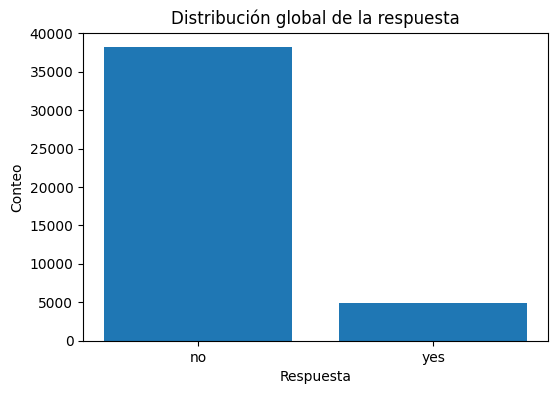


% YES por año:
   year  success_pct
0  2012     4.585873
1  2013     7.737161
2  2014    23.009101


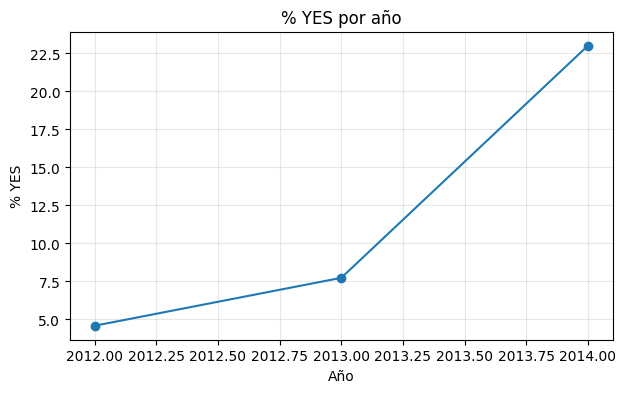

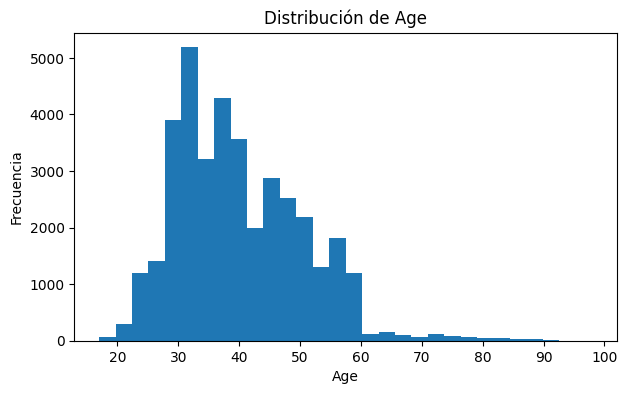

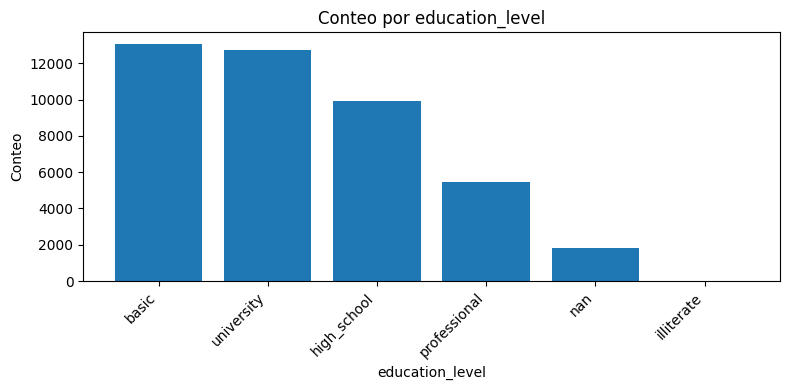

In [32]:
# === DIAGNÓSTICO RÁPIDO + GRÁFICAS BÁSICAS (robusto) ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 0) Comprobaciones básicas
print("Shape df_master:", getattr(df_master, "shape", None))
print("Columnas reales en df_master:")
cols = list(df_master.columns)
print(cols)

# 1) Localizo la columna target disponible (sin renombrar nada)
target_candidates = [c for c in ["y", "suscripcion"] if c in cols] #Lo coloco asi ya que antes había cambiado la columna a "suscripcion"
#pero luego al unir todo me salía como "Y" y no me la ubicaba, la volví a cambiar a suscripción en algún punto del codigo y no lo ubico
target_col = target_candidates[0] if target_candidates else None
print("Target detectada:", target_col)

# 2) Intento crear una serie de 'year' SIN añadir columnas permanentes
year_series, year_source = None, None
if "cohort" in cols:
    year_series = pd.to_numeric(df_master["cohort"], errors="coerce")
    year_source = "cohort"
elif "date" in cols:
    year_series = pd.to_datetime(df_master["date"], errors="coerce").dt.year
    year_source = "date"
elif "dt_customer" in cols:
    year_series = pd.to_datetime(df_master["dt_customer"], errors="coerce").dt.year
    year_source = "dt_customer"

print("Columna usada para el año:", year_source)

# 3) Gráfico 1: Conteo global de la target
if target_col is not None:
    tgt = (
        df_master[target_col]
        .astype(str).str.strip().str.lower()
        .replace({"true":"yes","1":"yes","false":"no","0":"no"})
    )
    conteo = tgt.value_counts(dropna=False)
    print("\nConteo target (normalizado solo para contar):")
    print(conteo)

    plt.figure(figsize=(6,4))
    plt.bar(conteo.index.astype(str), conteo.values)
    plt.title("Distribución global de la respuesta")
    plt.xlabel("Respuesta"); plt.ylabel("Conteo")
    plt.show()
else:
    print("\n⚠️ No se encontró ninguna columna target entre ['y','suscripcion','y_bank','y_client'].")

# 4) Gráfico 2: % YES por año (si hay año y target)
if (year_series is not None) and (target_col is not None):
    tmp = pd.DataFrame({
        "year": year_series,
        "target": tgt  # usamos la serie normalizada para contar
    }).dropna(subset=["year"])
    tmp["year"] = tmp["year"].astype(int)

    success_rate = (
        tmp.groupby("year")["target"]
           .apply(lambda s: (s == "yes").mean() * 100)
           .reset_index(name="success_pct")
    )
    print("\n% YES por año:")
    print(success_rate)

    plt.figure(figsize=(7,4))
    plt.plot(success_rate["year"], success_rate["success_pct"], marker="o")
    plt.title("% YES por año")
    plt.xlabel("Año"); plt.ylabel("% YES")
    plt.grid(True, alpha=0.3)
    plt.show()
else:
    print("\nℹ️ Salté el gráfico temporal: no tengo año o target.")

# 5) Gráfico 3: Histograma de edad (si existe)
if "age" in cols:
    age = pd.to_numeric(df_master["age"], errors="coerce").dropna()
    plt.figure(figsize=(7,4))
    plt.hist(age, bins=30)
    plt.title("Distribución de Age")
    plt.xlabel("Age"); plt.ylabel("Frecuencia")
    plt.show()
else:
    print("\nℹ️ Salté histograma: no existe 'age'.")

# 6) Gráfico 4: Barras de education_level (si existe)
if "education_level" in cols:
    edu_counts = df_master["education_level"].value_counts(dropna=False)
    plt.figure(figsize=(8,4))
    plt.bar(edu_counts.index.astype(str), edu_counts.values)
    plt.title("Conteo por education_level")
    plt.xlabel("education_level"); plt.ylabel("Conteo")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
else:
    print("\nℹ️ Salté barras: no existe 'education_level'.")


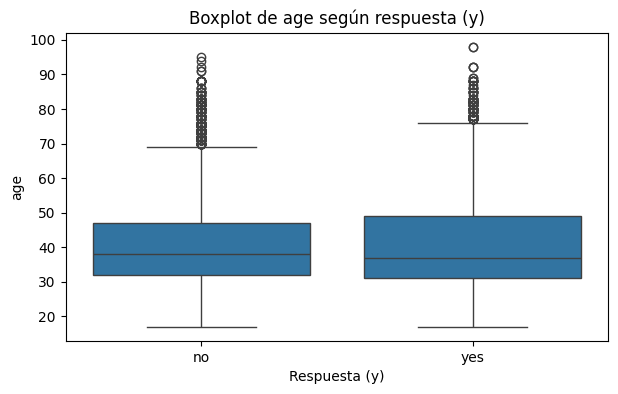

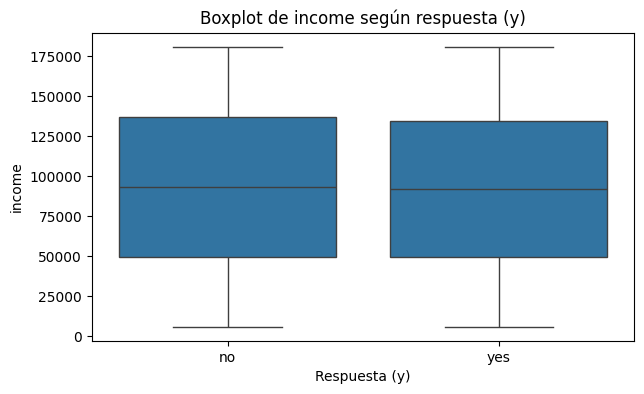

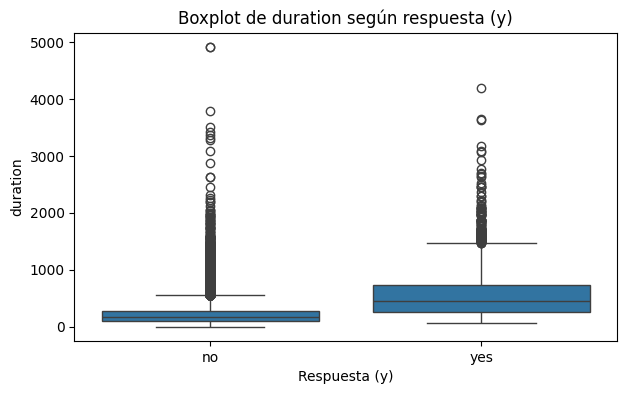

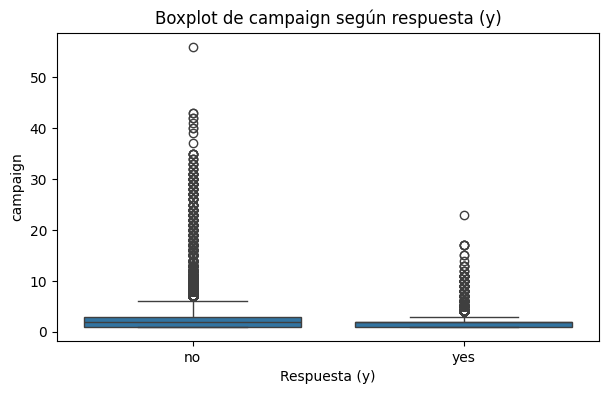

In [33]:
# === BOXPLOTS DE VARIABLES NUMÉRICAS CON OUTLIERS (vs Y) ===
# Explicación: Quiero analizar la dispersión de las variables numéricas clave
# y resaltar los valores atípicos. No elimino outliers porque son datos reales,
# solo los identifico y los muestro.

import matplotlib.pyplot as plt
import seaborn as sns

# Me aseguro de que la target esté lista para el hue
df_plot = df_master.copy()
df_plot["y_norm"] = (
    df_plot["suscripcion"].astype(str).str.strip().str.lower()
    .replace({"true":"yes","1":"yes","false":"no","0":"no"})
)

num_cols = ["age", "income", "duration", "campaign"]

for col in num_cols:
    if col in df_plot.columns:
        plt.figure(figsize=(7,4))
        sns.boxplot(data=df_plot, x="y_norm", y=col)
        plt.title(f"Boxplot de {col} según respuesta (y)")
        plt.xlabel("Respuesta (y)")
        plt.ylabel(col)
        plt.show()
    else:
        print(f"ℹ️ La columna {col} no existe en df_master.")


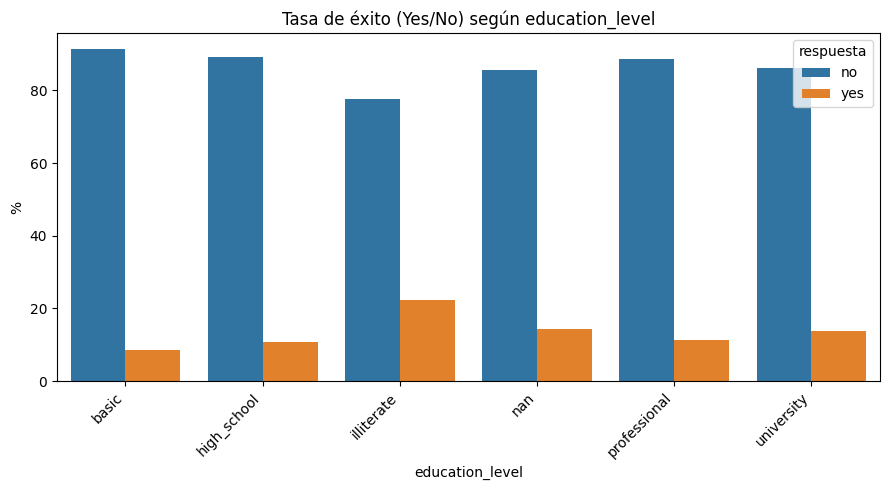

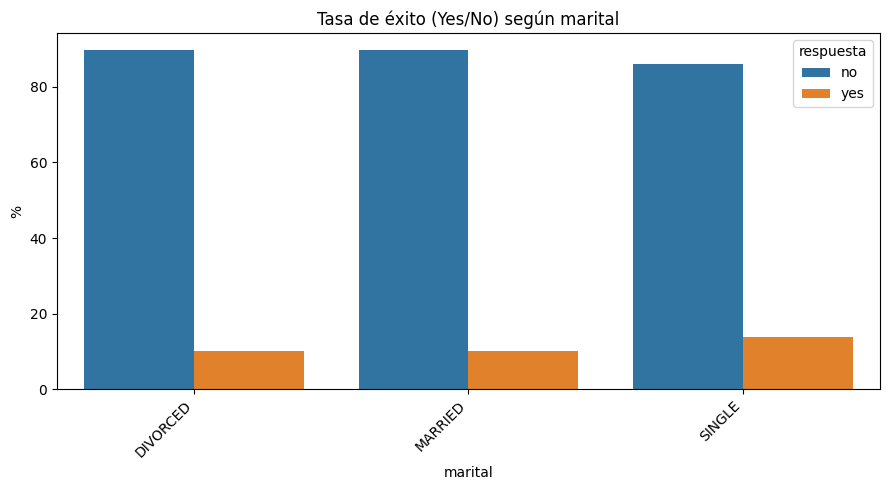

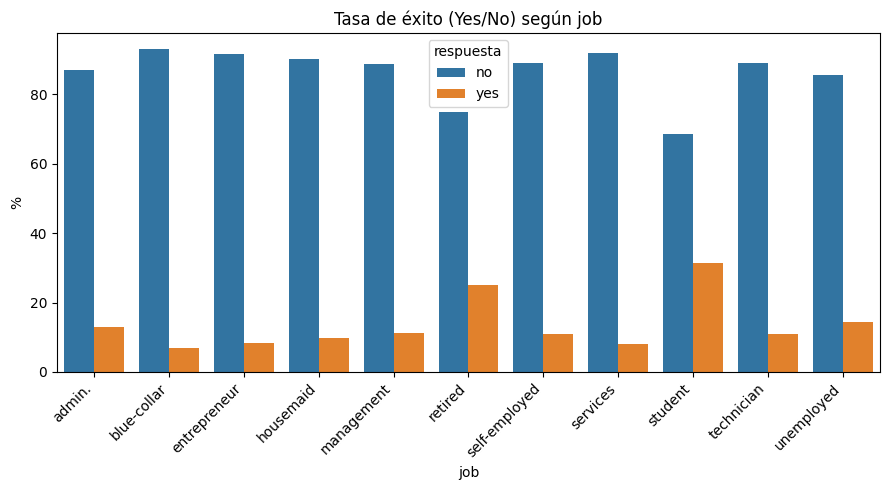

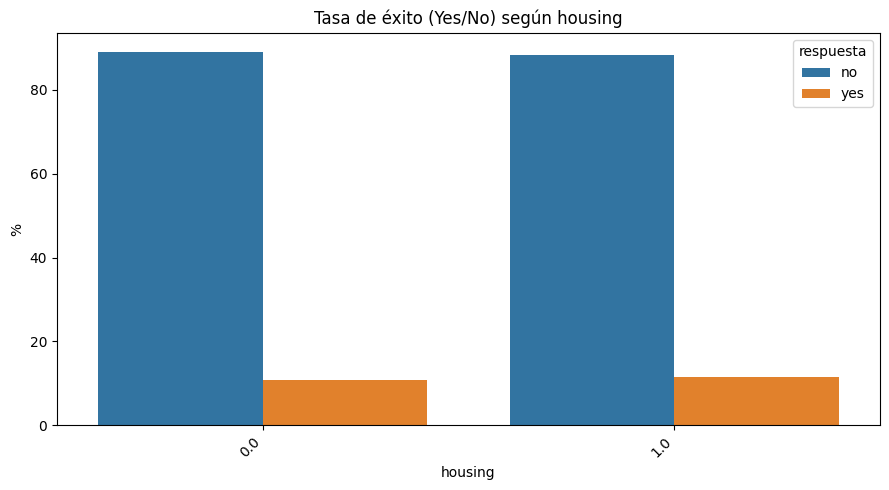

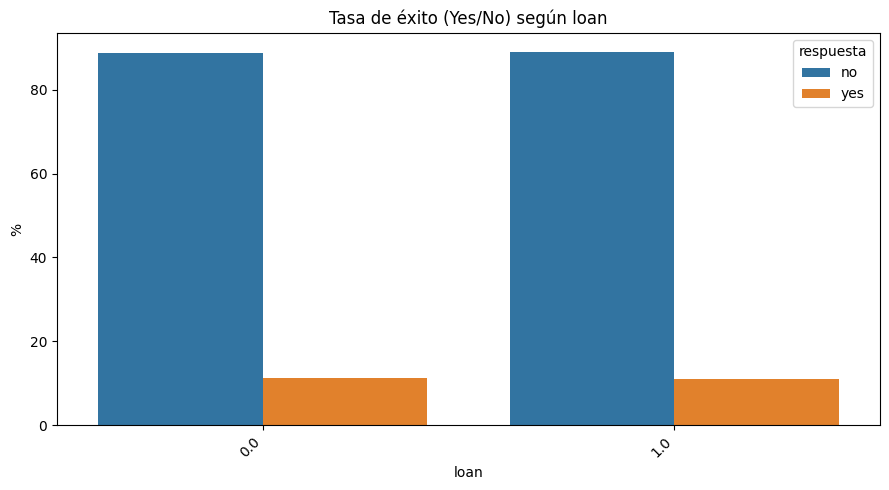

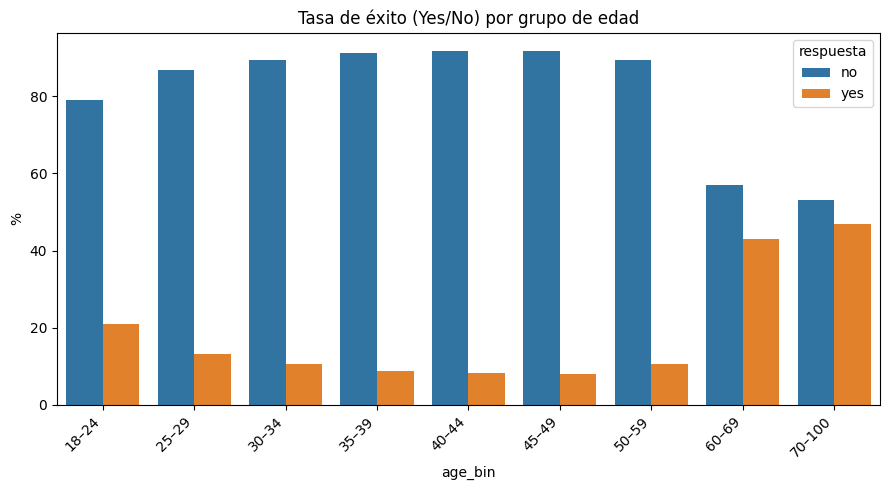

In [35]:
# === % de SUSCRIPCIÓN por categoría (robusto con crosstab) ===
# Explicación:
# - No toco df_master. Trabajo sobre una copia.
# - Detecto la target (suscripcion o y) y la normalizo SOLO para contar.
# - Uso pd.crosstab(normalize='index') para proporciones por categoría.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

try:
    import seaborn as sns
    _use_sns = True
except Exception:
    _use_sns = False

dfc = df_master.copy()

# 1) Target: suscripcion si existe; si no, y
target_col = "suscripcion" if "suscripcion" in dfc.columns else ("y" if "y" in dfc.columns else None)
if target_col is None:
    raise KeyError("No encontré columna objetivo: ni 'suscripcion' ni 'y'.")

# Normalizo SOLO para contar (no modifico la original)
dfc["target_norm"] = (
    dfc[target_col]
      .astype(str).str.strip().str.lower()
      .replace({"true":"yes","1":"yes","false":"no","0":"no"})
)

def plot_pct_by_category(df, col, title=None):
    if col not in df.columns:
        print(f"ℹ️  Columna '{col}' no existe. Me la salto.")
        return
    tab = (pd.crosstab(df[col], df["target_norm"], normalize="index") * 100).reset_index()
    # melt a formato largo
    long = tab.melt(id_vars=[col], var_name="respuesta", value_name="pct")

    # gráfico
    if _use_sns:
        plt.figure(figsize=(9,5))
        sns.barplot(data=long, x=col, y="pct", hue="respuesta")
        plt.ylabel("%")
        plt.xlabel(col)
        plt.title(title or f"% Yes/No por {col}")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()
    else:
        # fallback matplotlib
        piv = long.pivot(index=col, columns="respuesta", values="pct").fillna(0)
        cats = piv.index.astype(str)
        yes = piv["yes"] if "yes" in piv.columns else pd.Series(0, index=piv.index)
        no  = piv["no"]  if "no"  in piv.columns else pd.Series(0, index=piv.index)
        x = np.arange(len(cats))
        width = 0.42

        plt.figure(figsize=(9,5))
        plt.bar(x - width/2, yes, width, label="yes")
        plt.bar(x + width/2, no,  width, label="no")
        plt.xticks(x, cats, rotation=45, ha="right")
        plt.ylabel("%")
        plt.xlabel(col)
        plt.title(title or f"% Yes/No por {col}")
        plt.legend()
        plt.tight_layout()
        plt.show()

# 2) Categóricas principales
for c in ["education_level", "marital", "job", "housing", "loan"]:
    plot_pct_by_category(dfc, c, title=f"Tasa de éxito (Yes/No) según {c}")

# 3) Grupos de edad (bins) + gráfico
if "age" in dfc.columns:
    # defino bins y etiquetas (ajusto el tope superior al máx. observado)
    max_age = pd.to_numeric(dfc["age"], errors="coerce").max()
    top = int(np.ceil(max_age / 10.0) * 10) if pd.notna(max_age) else 100
    bins = [18, 25, 30, 35, 40, 45, 50, 60, 70, top]
    labels = ["18–24","25–29","30–34","35–39","40–44","45–49","50–59","60–69",f"70–{top}"]

    dfc["age_bin"] = pd.cut(pd.to_numeric(dfc["age"], errors="coerce"),
                            bins=bins, labels=labels, include_lowest=True, right=True)
    plot_pct_by_category(dfc, "age_bin", title="Tasa de éxito (Yes/No) por grupo de edad")
else:
    print("ℹ️  No existe 'age'; salto bins de edad.")


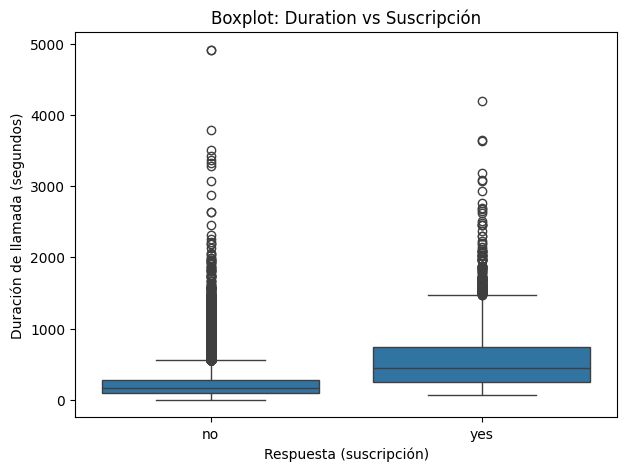

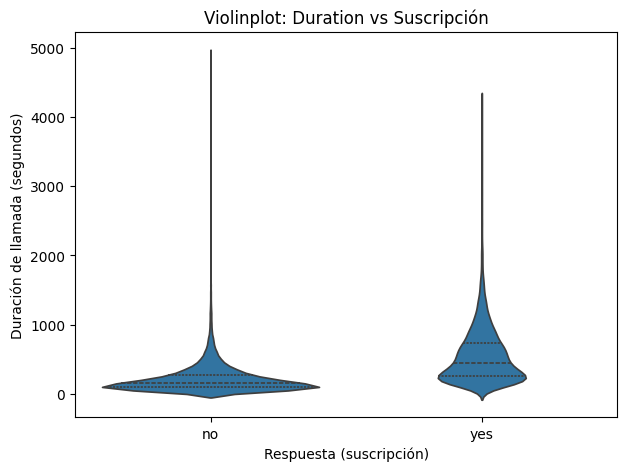

In [36]:
# === DURATION vs SUSCRIPCIÓN ===
# Explicación: Quiero comprobar cómo influye la duración de la llamada
# en el éxito de la campaña. Para ello, grafico la distribución de 'duration'
# separando entre clientes que dijeron 'yes' y 'no'.

import matplotlib.pyplot as plt
import seaborn as sns

dfc = df_master.copy()

# Normalizo la target solo para contar
dfc["suscripcion"] = (
    dfc["suscripcion"].astype(str).str.strip().str.lower()
    .replace({"true":"yes","1":"yes","false":"no","0":"no"})
)

# Boxplot
plt.figure(figsize=(7,5))
sns.boxplot(data=dfc, x="suscripcion", y="duration")
plt.title("Boxplot: Duration vs Suscripción")
plt.xlabel("Respuesta (suscripción)")
plt.ylabel("Duración de llamada (segundos)")
plt.show()

# Violinplot (opcional, complementa el boxplot mostrando densidad)
plt.figure(figsize=(7,5))
sns.violinplot(data=dfc, x="suscripcion", y="duration", inner="quartile")
plt.title("Violinplot: Duration vs Suscripción")
plt.xlabel("Respuesta (suscripción)")
plt.ylabel("Duración de llamada (segundos)")
plt.show()


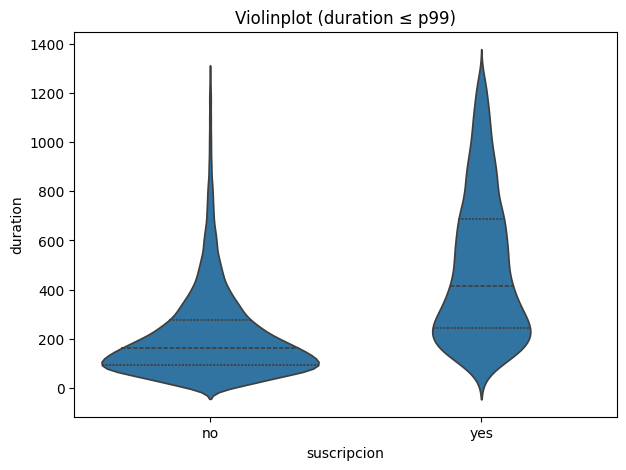

In [ ]:
# Ampliaré la grafica tipo violín para ver mejor la densidad de los datos ya que se colocó como base para el grafimo mas segundos de duracion de los necesarios
p99 = df_master["duration"].quantile(0.99)
df_small = df_master[df_master["duration"] <= p99].copy()
df_small["suscripcion"] = df_small["suscripcion"].astype(str).str.strip().str.lower()

import seaborn as sns, matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
sns.violinplot(data=df_small, x="suscripcion", y="duration", inner="quartile")
plt.title("Violinplot (duration ≤ p99)")
plt.show()


In [ ]:
(df_master.assign(suscripcion=lambda d: d["suscripcion"].astype(str).str.lower().str.strip())
          .groupby("suscripcion")["duration"]
          .describe(percentiles=[.25,.5,.75]))
#Tabla resumen con los datos


,count,mean,std,min,25%,50%,75%,max
suscripcion,,,,,,,,
no,38156.0,220.430208,207.121495,0.0,95.0,163.0,278.0,4918.0
yes,4844.0,551.621387,398.398264,63.0,253.0,449.0,740.0,4199.0


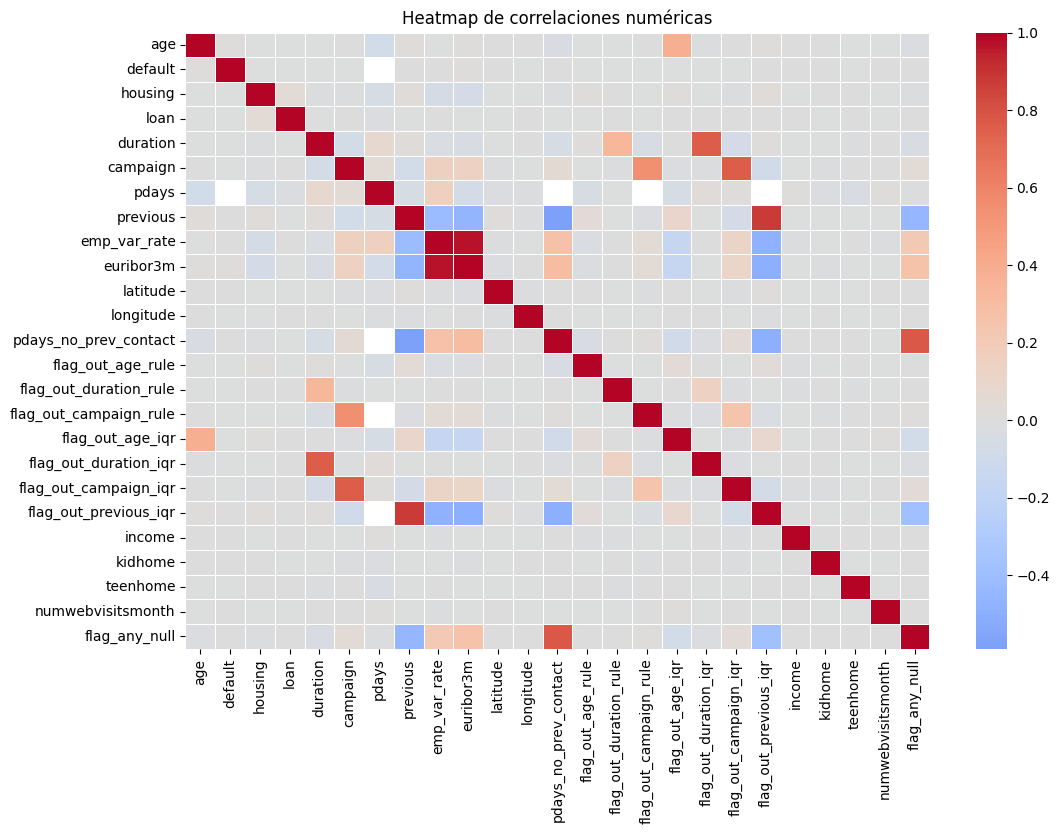


Top correlaciones absolutas (sin duplicados):
flag_any_null          flag_any_null             1.000000
euribor3m              emp_var_rate              0.972361
flag_out_previous_iqr  previous                  0.877658
pdays_no_prev_contact  flag_any_null             0.773331
duration               flag_out_duration_iqr     0.761294
flag_out_campaign_iqr  campaign                  0.758076
pdays_no_prev_contact  previous                  0.589259
campaign               flag_out_campaign_rule    0.548433
euribor3m              flag_out_previous_iqr     0.494196
flag_out_previous_iqr  pdays_no_prev_contact     0.491192
dtype: float64


In [39]:
# === HEATMAP DE CORRELACIONES NUMÉRICAS ===
# Explicación: Para entender la relación entre variables numéricas,
# calculo la matriz de correlación de Pearson y la represento en un heatmap.
# Esto me ayuda a detectar asociaciones fuertes o redundancias.

import seaborn as sns
import matplotlib.pyplot as plt

# 1) Selecciono solo columnas numéricas
num_cols = df_master.select_dtypes(include=[np.number]).columns

# 2) Calculo la matriz de correlaciones (Pearson)
corr_matrix = df_master[num_cols].corr(method="pearson")

# 3) Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, center=0, linewidths=0.5)
plt.title("Heatmap de correlaciones numéricas")
plt.show()

# 4) (Opcional) Top correlaciones absolutas
corr_unstack = (
    corr_matrix.abs()
    .unstack()
    .sort_values(ascending=False)
    .drop_duplicates()
)
print("\nTop correlaciones absolutas (sin duplicados):")
print(corr_unstack.head(10))
